In [23]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import json

import nibabel
import nilearn
import numpy as np
import sklearn
import pandas as pd

from nilearn import plotting

import rtcloud

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# Prepare test samples
test_subject = 2
data_dir = "data"

haxby = nilearn.datasets.fetch_haxby(data_dir="datasets", subjects=[test_subject])
labels_test = pd.read_csv(haxby.session_target[0], sep=" ")
y_test_all = labels_test["labels"]
condition_mask_test = y_test_all.isin(["face", "house"])
fmri_img_test = nilearn.image.index_img(haxby.func[0], condition_mask_test)
fmri_data_test = fmri_img_test.get_data()
y_test = y_test_all[condition_mask_test]
for sample in range(fmri_data_test.shape[-1]):
    sample_data = fmri_data_test[..., sample][..., np.newaxis]
    sample_img = nilearn.image.new_img_like(fmri_img_test, sample_data)
    nibabel.save(sample_img, "{}/subject-{}-sample-{:03}.nii.gz".format(data_dir, test_subject, sample))

In [27]:
conf = {
    'test': 1
}
mask_img = nibabel.load(haxby.mask)
conf['experiment_data'] = {
    "models": sklearn.externals.joblib.load("models.pkl"),
    "mask_data": mask_img.get_data().astype(bool),
    "mask_affine": mask_img.affine,
}

client = rtcloud.Client(server_ip='34.237.207.176', conf=conf)
client.start()

Starting to watch!


ERROR:pika.adapters.base_connection:Connection to 34.237.207.176:5672 failed: timeout
ERROR:pika.adapters.blocking_connection:Connection open failed - 'Connection to 34.237.207.176:5672 failed: timeout'
Process Process-1:
ERROR:pika.adapters.base_connection:Connection to 34.237.207.176:5672 failed: timeout
ERROR:pika.adapters.blocking_connection:Connection open failed - 'Connection to 34.237.207.176:5672 failed: timeout'
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/mihai/.local/lib/python3.5/site-packages/multiprocess/process.py", line 249, in _bootstrap
    self.run()
  File "/home/mihai/.local/lib/python3.5/site-packages/multiprocess/process.py", line 249, in _bootstrap
    self.run()
  File "/home/mihai/.local/lib/python3.5/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mihai/.local/lib/python3.5/site-packages/multiprocess/process.py", line 93, in run
    se

KeyboardInterrupt: 

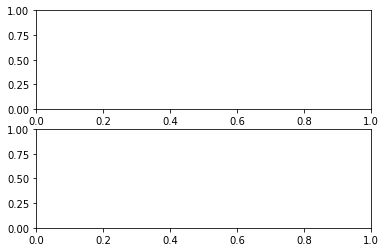

In [19]:
client.queue(input_dir=data_dir, tr=2002, loop=True)
client.watch()
client.display()